# Noise Eliminator

## Table of Contents

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

## Read Audio file

length = 51.06585034013605s


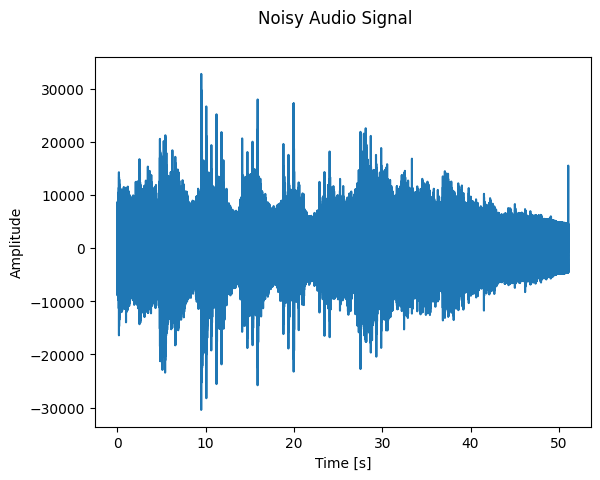

In [12]:
sample_rate, data = wavfile.read('noisy_tlou.wav')
length = data.shape[0] / sample_rate
print(f'length = {length}s')
time = np.linspace(0, length, data.shape[0])
plt.plot(time, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.suptitle('Noisy Audio Signal')
plt.show()

## Fourier Transform of The Audio Signal

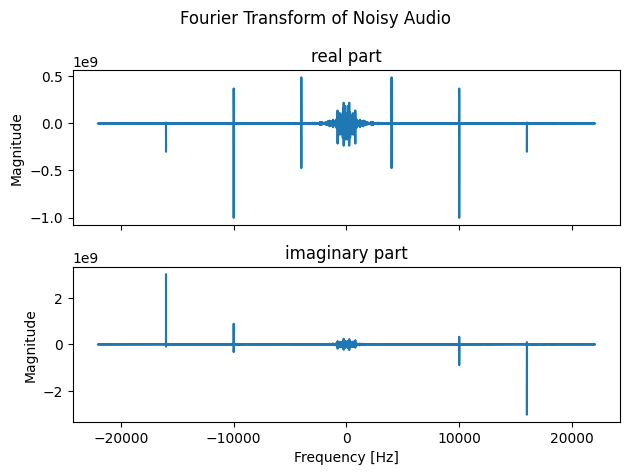

In [19]:
fourier = np.fft.fft(data)
freq = np.fft.fftfreq(data.shape[0], 1/sample_rate)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Fourier Transform of Noisy Audio')
ax1.plot(freq, fourier.real)
ax1.set_title('real part')
ax2.plot(freq, fourier.imag)
ax2.set_title('imaginary part')

for ax in fig.get_axes():
    ax.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
    ax.label_outer()
fig.tight_layout()